# Hands-on 3
### The Olivetti faces dataset
This dataset contains a set of face images taken at AT&T Laboratories Cambridge. There are ten different images of each of 40 distinct subjects.
|Attribute|Value|
|:------|:-|
|Classes|40|
|Samples total|400|
|Dimensionality|4096|
|Features| real, between 0 and 1|

In [3]:
# Initialization
%matplotlib inline
from warnings import filterwarnings
filterwarnings("ignore")

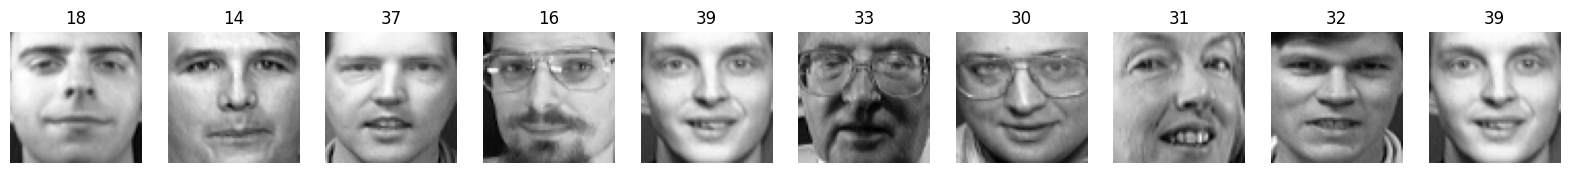

In [4]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from random import randint
from sklearn.datasets import fetch_olivetti_faces
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split as split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# Load the Olivetti faces dataset
data = fetch_olivetti_faces()
X = data.images  # Images data
y = data.target  # Target labels

# Reshape the images data to 2D array (flatten the images)
n_samples, h, w = X.shape
X = X.reshape(n_samples, h * w)

# Function to plot original and reconstructed images
def plot_faces(original, n=10):
    rn = [randint(0, 399) for _ in range(n)]
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # Original faces
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(original[rn[i]].reshape((h, w)), cmap='gray')
        plt.title(y[rn[i]])
        plt.axis('off')
    plt.show()
    
# Plot some of the faces before and after PCA transformation
plot_faces(X, n=10)

To do: 
  - Split the dataset into training (70%) and testing (30%) sets.
  - Train a knn model (using default settings).
  - Evaluate its performance using the testing set and print the score.

In [7]:
X_train, X_test, y_train, y_test = split(X, y, stratify=y, train_size=0.7, random_state=42)
knn1 = KNeighborsClassifier().fit(X_train, y_train)
print(f'knn score: {knn1.score(X_test, y_test):.3%}')

knn score: 82.500%


To do: 
  - Construct a pipeline with two steps: dimensionality reduction using PCA ('dr') and classification ('clf').
  - Use gridsearch to search for the best process for each steps as follows:
    - dimensionality reduction with PCA: 50 to 200 principal components (with an interval of 50).
    - classification:  kNN, logistic regression, decision tree, random forest, support vector machine and multilayer perceptron
    - Use default settings for all the classifiers.

In [8]:
pipe = Pipeline([('dr', PCA()), ('clf', KNeighborsClassifier())])
params = {}
params['dr__n_components'] = [50, 100, 150, 200]
params['clf'] = [KNeighborsClassifier(), LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), SVC(), MLPClassifier()]

gs = GridSearchCV(pipe, params, cv=5, n_jobs=-1, verbose=2)
gs.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


,estimator,Pipeline(step...lassifier())])
,param_grid,"{'clf': [KNeighborsClassifier(), LogisticRegression(), ...], 'dr__n_components': [50, 100, ...]}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_components,100


To do: 
- Print the best parameters
- Store the best model as 'model'.
- Evaluate the best model using the testing set and print the score.

In [9]:
print(gs.best_params_)
model = gs.best_estimator_
model.fit(X_train, y_train)
print(f'Best model accuracy: {model.score(X_test, y_test):.3%}')

{'clf': LogisticRegression(), 'dr__n_components': 100}
Best model accuracy: 97.500%


To do:
- Print classification report for the best model

In [10]:
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         3
           4       1.00      0.67      0.80         3
           5       0.75      1.00      0.86         3
           6       1.00      1.00      1.00         3
           7       0.75      1.00      0.86         3
           8       1.00      1.00      1.00         3
           9       1.00      0.33      0.50         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         3
          16       1.00      1.00      1.00         3
          17       1.00    